In [1]:
from topagnps2cche1d import Node, Reach, Watershed

In [2]:
s = Watershed()

In [33]:
reach1 = Reach(id=1)
reach2 = Reach(id=2, receiving_reach_id=1)
reach3 = Reach(id=3, receiving_reach_id=5)
reach4 = Reach(id=4, receiving_reach_id=5)
reach5 = Reach(id=5, receiving_reach_id=9)
reach6 = Reach(id=6, receiving_reach_id=8)
reach7 = Reach(id=7, receiving_reach_id=8)
reach8 = Reach(id=8, receiving_reach_id=9)
reach9 = Reach(id=9, receiving_reach_id=1)



In [34]:
s.add_reach(reach1)
s.add_reach(reach2)
s.add_reach(reach3)
s.add_reach(reach4)
s.add_reach(reach5)
s.add_reach(reach6)
s.add_reach(reach6)
s.add_reach(reach7)
s.add_reach(reach8)
s.add_reach(reach9)


In [35]:
s.keep_all_reaches()

In [36]:
current_connectivity_dict = s.update_connectivity()

In [37]:
current_connectivity_dict

{1: [2, 9], 5: [3, 4], 9: [5, 8], 8: [6, 7]}

In [38]:
s.assign_strahler_number_to_reaches(mode='fully_connected')

In [28]:
s.ignore_reaches_with_strahler_leq(strahler_threshold=1)

In [31]:
s.update_connectivity()

{1: [9], 5: [], 9: [5, 8], 8: []}

In [39]:
reaches = s.reaches

for reach_id, reach in reaches.items():
    print(f'Strahler number for reach ({reach_id}): {reach.strahler_number} / Reach Ignore: {reach.ignore}')

Strahler number for reach (1): 3 / Reach Ignore: False
Strahler number for reach (2): 1 / Reach Ignore: False
Strahler number for reach (3): 1 / Reach Ignore: False
Strahler number for reach (4): 1 / Reach Ignore: False
Strahler number for reach (5): 2 / Reach Ignore: False
Strahler number for reach (6): 1 / Reach Ignore: False
Strahler number for reach (7): 1 / Reach Ignore: False
Strahler number for reach (8): 2 / Reach Ignore: False
Strahler number for reach (9): 3 / Reach Ignore: False


In [41]:
import pandas as pd

df = pd.DataFrame({'Reach_ID': [1,2,3,4,5,6,7,8,9], 'Receiving_Reach': [None,1,5,5,9,8,8,9,1]})

In [52]:
for row in df.itertuples():
    # print(row[])
    print(row.Reach_ID, row.Receiving_Reach)

1 nan
2 1.0
3 5.0
4 5.0
5 9.0
6 8.0
7 8.0
8 9.0
9 1.0


In [58]:
for index, row in df.iterrows():
    print(row['Reach_ID'])

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


In [62]:
from pathlib import Path

In [ ]:
w = Watershed()



In [3]:
import networkx as nx

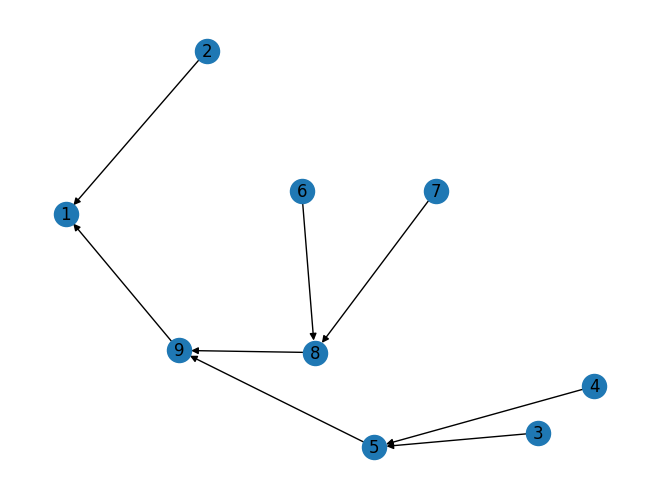

In [12]:
G = nx.DiGraph()

edges = [[2,1], [9,1], [5,9], [8,9], [6,8], [7,8], [3,5], [4,5]]

G.add_edges_from(edges)

node_labels = {node: node for node in G.nodes()}

pos = nx.planar_layout(G)

nx.draw(G, with_labels=True, labels=node_labels)

In [13]:
postorder_nodes = nx.traversal.dfs_postorder_nodes(G)

In [15]:
list(postorder_nodes)

[1, 2, 9, 5, 8, 6, 7, 3, 4]

In [49]:
def custom_dfs_traversal_sorted_predecessors(G, start=None, visit_ascending_order=True, postorder=True):
        """
        Custom DFS traversal of graph G given a start node "start". If start node is not provided 
        it will use the node with an out degree equal to 0
        If visit_ascending_order = True then the predecessors of a given node will be visited in ascending order
            (assuming nodes are sortable)
        If postorder is true the nodes will be listed in a postorder fashion
        """
        if start is None:
            # list nodes with out_degree 0 and take the first one
            start = [node[0] for node in G.out_degree() if node[1]==0][0]

        visited = set()
        result = []

        stack = [start]
        while stack:
            node = stack.pop()
            if node not in visited:
                visited.add(node)
                neighbors = sorted(G.predecessors(node), reverse=not(visit_ascending_order))
                unvisited_neighbors = [neighbor for neighbor in neighbors if neighbor not in visited]
                stack.extend(unvisited_neighbors)
                result.append(node)

        if postorder:
            result = result[::-1]

        return result

In [51]:
custom_dfs_traversal_sorted_predecessors(G, visit_ascending_order=False)

[7, 6, 8, 4, 3, 5, 9, 2, 1]